In [1]:
# Read the performance metrics of the genetic algorithm
with open('out.txt', 'r') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 

In [2]:
values = content[1].split("\t")

In [3]:
# Calculate best and average fitness values
import ast
from ast import literal_eval as make_tuple
bestx = list()
besty = list()
bestz = list()
fits = list()
avgs = list()
mins = list()
for i in range(1,100,1):
    values = content[i].split("\t")
    fits.append(make_tuple(values[3])[0])
    lit = ast.literal_eval(values[2])
    bestx.append(lit[0])
    besty.append(lit[1])
    bestz.append(lit[2])
    lit = ast.literal_eval(values[4])
    avgs.append(lit)
    lit = ast.literal_eval(values[7])
    mins.append(lit)

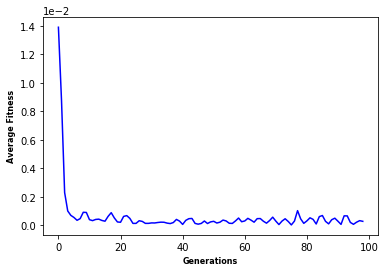

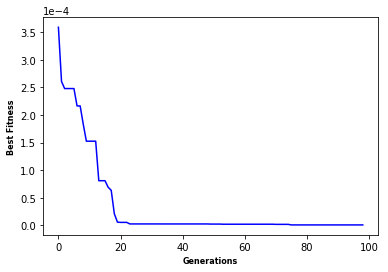

In [5]:
# Add plot for avgs
import matplotlib.pyplot as plt
plt.plot(avgs, c = "blue")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Generations',fontsize=8,fontweight="bold")
plt.ylabel('Average Fitness',fontsize=8,fontweight="bold")
plt.savefig('Average.tiff', format='tiff', dpi=600)
plt.show()

plt.plot(fits, c = "blue")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Generations',fontsize=8,fontweight="bold")
plt.ylabel('Best Fitness',fontsize=8,fontweight="bold")
plt.savefig('Best.tiff', format='tiff', dpi=600)
plt.show()

In [9]:
import numpy as np
with open('pop.csv', 'r') as f:
    pop = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
pop = [x.strip() for x in pop] 

In [10]:
np.log(ast.literal_eval(ast.literal_eval(pop[0])[0])[0])

-18.958032147729785

In [11]:
import ast
import numpy as np
x = list()
y = list()
z = list()
for i in range(0,200):
    lit = ast.literal_eval(pop[i])
    for j in range(0,10):
        t = ast.literal_eval(lit[j])
        x.append(t[0])
        y.append(t[1])
        z.append(t[2])
#from numpy import array
#x = array( x )
#y = array( x )
#z = array( x )

In [12]:
bestz[98:]

[0.13850834930512348]

/Users/ozi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


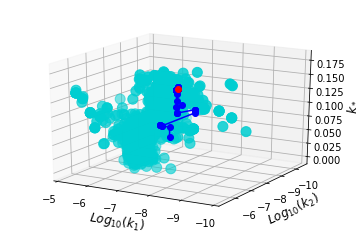

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.log10(x), np.log10(y), z, c='darkturquoise', marker='o',s=100)
ax.plot3D(np.log10(bestx[:166]), np.log10(besty[:166]), bestz[:166], c='b', marker='o')
ax.plot3D(np.log10(bestx[98:]), np.log10(besty[98:]), bestz[98:], c='r', marker='o')
ax.set_xlabel('$Log_{10}(k_1)$',fontsize=12,fontweight = 'bold')
ax.set_ylabel('$Log_{10}(k_2)$',fontsize=12,fontweight = 'bold')
ax.set_zlabel('$k_*$',fontsize=12,fontweight = 'bold')
ax.view_init(elev=20, azim=-240)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.figure.savefig('Explore.tiff', format='tiff', dpi=1200)
plt.show()

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
grid1 = pd.read_csv("tumor.csv.0.100")

Text(0,0.5,'Length of BE')

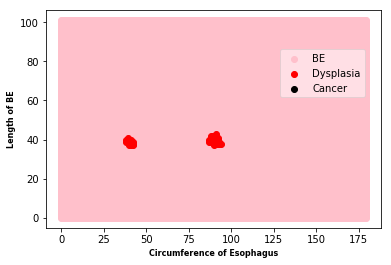

In [66]:
import matplotlib.pyplot as plt
gridN = grid1[grid1['type']==1]
plt.scatter(gridN["xcoord"],gridN["ycoord"],c="pink", label="BE")
gridN = grid1[grid1['type']==2]
plt.scatter(gridN["xcoord"],gridN["ycoord"],c="r", label="Dysplasia")
gridN = grid1[grid1['type']==3]
plt.scatter(gridN["xcoord"],gridN["ycoord"],c="black", label="Cancer")
leg = plt.legend(loc=(0.7,0.6))
leg.get_frame().set_alpha(0.5)
plt.xlabel('Circumference of Esophagus',fontsize=8,fontweight="bold")
plt.ylabel('Length of BE',fontsize=8,fontweight="bold")
#plt.axhline(y=0.008, xmin=0, xmax=1, linestyle='--' ,color="red")
#plt.axhline(y=0.033, xmin=0, xmax=1, linestyle='--' ,color="red")
#plt.axhline(y=0.075, xmin=0, xmax=1, linestyle='--' ,color="red")
#plt.savefig('30.tiff', format='tiff', dpi=600)
#plt.show()

In [61]:
def seattlePerturbation(n,df):
    frames = list()
    sampled_x = {}
    sampled_y = {}
    random.seed(n)
    if len(df) > 0: # determine the length of the BE - y axis       
        max_y = int(df['ycoord'].max())
    else:
        max_y = 0
    ''' Collect different biopsy samples'''
    for biopsy_start in range(0,1,1):
        '''Sample points on the length '''
        start_y = round(random.uniform(24,48)) # assign here so that no need to re-calculate in the loop
        j = 0
        end = 0
        while start_y < max_y:
            j = j + 1
            end = start_y + 7
            if (end > max_y):
                break
            sampled_y[str(j)] = range(start_y,end,1)
            start_y = end + round(random.uniform(24,48))
        detected = list()
        '''Sample points on the width - circumference'''
        start_x = 16
        for i in range(1,5): # Getting 4 samples on the x-axis
            end = start_x + 12
            if (end < 180):
                sampled_x[str(i)] = range(start_x,end,1)
                start_x = start_x + 12 + 33
            else:
                sampled_x[str(i)] = [m for z in (range(start_x,180,1) , range(0, end-180,1)) for m in z]      
        '''Perturbations'''
        for i in range(1,len(sampled_x)+1):
            for j in range(1,len(sampled_y)+1):
                dx = list(sampled_x[str(i)])
                perturbation = round(random.uniform(-12,12))
                for ind,x in enumerate(dx):
                    dx[ind] = dx[ind]+perturbation
                dy = list(sampled_y[str(j)])
                perturbation = round(random.uniform(-6,6))
                for ind,y in enumerate(dy):
                    if(dy[ind]+perturbation<max_y):
                        dy[ind] = dy[ind]+perturbation
                    else:
                        dy = sampled_y[str(j)]
                sample = df.loc[df['xcoord'].isin(dx) & df['ycoord'].isin(dy)]
                frames.append(sample)
        result = pd.concat(frames)
        return result

In [62]:
import random
grid1 = seattlePerturbation(7,grid1)

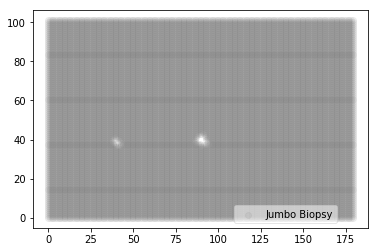

In [67]:
# Plor to show Seattle protocol
#import matplotlib.pyplot as plt
gridN = grid1[grid1['type']==1]
plt.scatter(gridN["xcoord"],gridN["ycoord"],c="grey", label="Jumbo Biopsy",alpha = 0.1)
leg = plt.legend(loc=(0.6,0.02))
leg.get_frame().set_alpha(0.5)
plt.savefig('Seattle.tiff', format='tiff', dpi=600)
plt.show()